<a href="https://colab.research.google.com/github/C-Ganesh/Machine-learning-practice/blob/main/Intro_to_machine_learning_(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

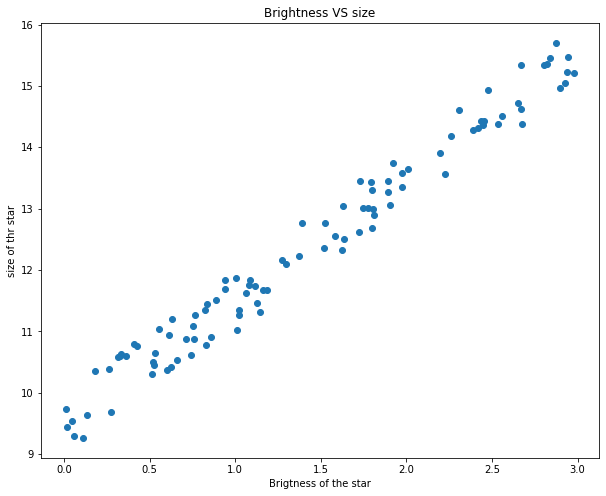

In [2]:
np.random.seed(100)
# to create similar random numbers

X = 3*np.random.rand(100,1)

y = 9+ 2*X+ np.random.rand(100,1)

plt.figure(figsize=(10,8))
plt.xlabel("Brigtness of the star")
plt.ylabel("size of thr star")
plt.title("Brightness VS size")
plt.scatter(X,y)
plt.show()

In [3]:
# we got Slope which is also called as Gradient and which is denoted by m and in ML world it is also known as W
# we got Intercept which is also called as Baises and which is denoted by c and in ML world it is denoted by b 

# Parameters
W = np.zeros(1)
b = 0

# HyperParameters
# these control how the training process goes on
epochs = 200
learning_rate = 0.1

# we are going to optimize parameters and not hyperparameters


In [4]:
# Forward Propagation

# Predicted Output
def Predict(X,W,b):
  return W*X + b

# Mean Squared Error
def Cost_function(X,y,W,b):
  total_error = 0
  for i in range(len(X)):
    total_error += (y[i]-Predict(X[i],W,b))**2
  return total_error/len(X)


In [5]:
# Backward Propagation

def update_weights(X,y,W,b,learning_rate):
  dW = 0
  db = 0
  n = len(X)
  
  for i in range(n):
    dW += -2 * X[i] * (y[i]- Predict(X[i],W,b)) # partial derivative with respect to W
    db += -2 * (y[i]- Predict(X[i],W,b)) # partial derivative with respective to b

  # Gradient Descent to update W and b
  W -= (dW / n) * learning_rate
  b -= (db / n) * learning_rate

  return W,b


In [6]:
# Training Process
def train(X,y,W,b,learning_rate,epochs,verbose = False):
  weights = np.zeros(epochs)
  baises = np.zeros(epochs)
  costs = []

  for i in range(epochs):
    cost = Cost_function(X,y,W,b)
    costs.append(cost)
    W,b = update_weights(X,y,W,b,learning_rate)
    weights[i] = W
    baises[i] = b

    if verbose:
      if i%10 == 0:
        print(i, W, b, cost)
  return weights, baises, costs

In [7]:
weights, baises, costs = train(X,y,W,b,learning_rate,epochs,verbose = True)

0 [3.79968485] [2.47068314] [155.64746471]
10 [4.20770098] [5.54148481] [4.93518776]
20 [3.42480131] [6.94968526] [2.12131486]
30 [2.91731858] [7.86248324] [0.93901619]
40 [2.5883665] [8.45416207] [0.4422524]
50 [2.37513862] [8.83769035] [0.23352827]
60 [2.23692356] [9.08629472] [0.14582912]
70 [2.14733208] [9.24744094] [0.10898077]
80 [2.08925856] [9.35189649] [0.09349828]
90 [2.05161511] [9.41960493] [0.08699303]
100 [2.02721449] [9.46349378] [0.08425974]
110 [2.01139793] [9.49194269] [0.0831113]
120 [2.00114558] [9.51038337] [0.08262876]
130 [1.99449996] [9.52233668] [0.08242601]
140 [1.99019226] [9.53008486] [0.08234082]
150 [1.98739999] [9.53510726] [0.08230503]
160 [1.98559003] [9.5383628] [0.08228999]
170 [1.9844168] [9.54047305] [0.08228367]
180 [1.98365632] [9.54184092] [0.08228102]
190 [1.98316337] [9.54272757] [0.0822799]


In [8]:
W = weights[-1]
b = baises[-1]
cost = costs[-1][0]

W,b,cost

(1.982869920359039, 9.543255388163416, 0.08227946419699117)

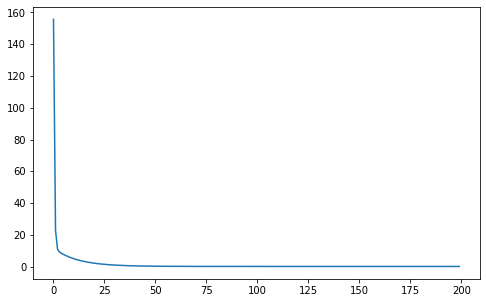

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(epochs),costs)
plt.show()

In [10]:
X_test = 3*np.random.rand(10,1)

y_test = 9+ 2*X_test + np.random.rand(10,1)
y_test

array([[12.45492127],
       [13.98411993],
       [11.84341387],
       [14.74491887],
       [14.51277273],
       [10.01359219],
       [11.70426659],
       [15.43176328],
       [ 9.70662849],
       [12.27362634]])

In [11]:
prediction = Predict(X_test, W,b)
prediction

array([[12.02436541],
       [13.68105497],
       [12.07050581],
       [14.64784205],
       [14.5813262 ],
       [ 9.96084252],
       [11.33826274],
       [15.37065438],
       [ 9.75518649],
       [12.47230709]])

In [12]:
rmse = np.sqrt((y_test-prediction)**2).mean()
rmse

0.18534442235788137

In [13]:
acc = float(sum(np.round(prediction) == np.round(y_test)))/float(len(y_test))

acc

0.9

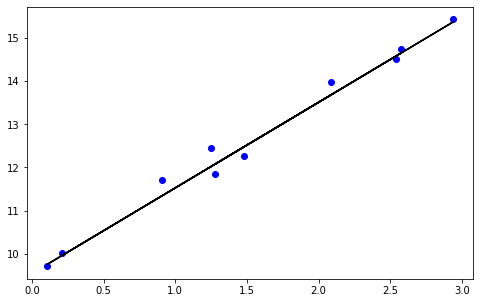

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, prediction, color='k')
plt.show()